In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
from pyclustertend import hopkins, vat, ivat
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/py19/lib/python3.6/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.clusterability.hopkins import hopkins_statistic

In [4]:
from avgn.clusterability.VAT import ordered_dissimilarity_matrix, ivat_ordered_dissimilarity_matrix

In [5]:
datasets = list(DATA_DIR.glob('embeddings/*/*.pickle'))
len(datasets)

83

In [6]:
def remove_outliers(z, pct = 99.5):
    """ GPU based UMAP algorithm produces some outliers that UMAP does not, but is much faster
    this is a quick fix for that. 
    """
    _min = np.percentile(z, (100-pct), axis=0)
    _max = np.percentile(z, pct, axis=0)
    for col in range(np.shape(z)[1]):
        mask = z[:,col] < _min[col]
        z[mask,col] = _min[col]
        mask = z[:,col] > _max[col]
        z[mask,col] = _max[col]
    return z

In [7]:
species_dict = {
    'castellucci_mouse_usv_segmented': {
        'species': 'Mouse',
        'group': 'mammal'
    },
    'BIRD_DB_Vireo_cassinii': {
        'species': 'Cassin\'s vireo',
        'group': 'songbird'
    },
    'gibbon_morita_segmented': {
        'species': 'Gibbon',
        'group': 'mammal'
    },
    'bengalese_finch_sober': {
        'species': 'Bengalese finch',
        'group': 'songbird'
    },
    'buckeye': {
        'species': 'Human (English)',
        'group': 'mammal'
    },
    'swamp_sparrow': {
        'species': 'Swamp sparrow',
        'group': 'songbird'
    },
    'mobysound_humpback_whale': {
        'species': 'Humpback whale',
        'group': 'mammal'
    },
    'koumura_bengalese_finch': {
        'species': 'Bengalese finch',
        'group': 'songbird'
    },
    'giant_otter': {
        'species': 'Giant otter',
        'group': 'mammal'
    },
    'BIRD_DB_Toxostoma_redivivum': {
        'species': 'California thrasher',
        'group': 'songbird'
    },
    'zebra_finch_gardner_segmented': {
        'species': 'Zebra finch',
        'group': 'songbird'
    },
    'katahira_white_munia_segmented': {
        'species': 'White-rumped munia',
        'group': 'songbird'
    },
    'european_starling_gentner_segmented': {
        'species': 'European starling',
        'group': 'songbird'
    },
}

In [11]:
ds_list = []
nex_max = 10000
clusterability_df = pd.DataFrame(columns=[
    'df', 'dataset', 'indv', 'sampled_indices', 'VAT', 'iVAT', 'order'
])
for dataset in tqdm(datasets):
    if dataset.parent.stem  in ds_list:
        continue
    ds_list.append(dataset.parent.stem)
    print(dataset.parent.stem)
    specs = np.stack(pd.read_pickle(dataset)[['spectrogram']].spectrogram.values)
    specs = specs.reshape(len(specs),-1)
    specs = scale(specs)
    print(dataset, np.shape(specs))
    if len(specs) <= nex_max:
        samples = np.arange(len(specs))
    else:
        samples = np.random.choice(np.arange(len(specs)), nex_max)
    VAT, order = ordered_dissimilarity_matrix(specs[samples])
    iVAT = ivat_ordered_dissimilarity_matrix(VAT)
    
    fig, axs = plt.subplots(ncols = 3, figsize=(15,5))
    axs[0].matshow(np.log(VAT))
    axs[1].matshow(VAT)
    axs[2].matshow(iVAT)
    plt.show()

    clusterability_df.loc[len(clusterability_df)] = [
        dataset, dataset.parent.stem, dataset.stem, samples, VAT, iVAT, order
    ]

castellucci_mouse_usv_segmented
/local/home/tsainbur/github_repos/avgn_paper/data/embeddings/castellucci_mouse_usv_segmented/VOC592.pickle (4101, 640)
(4101, 4101)
11495239700


(2,) (4099,)
(3,) (4098,)
(4,) (4097,)
(5,) (4096,)
(6,) (4095,)
(7,) (4094,)
(8,) (4093,)
(9,) (4092,)
(10,) (4091,)
(11,) (4090,)
(12,) (4089,)
(13,) (4088,)
(14,) (4087,)
(15,) (4086,)
(16,) (4085,)
(17,) (4084,)
(18,) (4083,)
(19,) (4082,)
(20,) (4081,)
(21,) (4080,)
(22,) (4079,)
(23,) (4078,)
(24,) (4077,)
(25,) (4076,)
(26,) (4075,)
(27,) (4074,)
(28,) (4073,)
(29,) (4072,)
(30,) (4071,)
(31,) (4070,)
(32,) (4069,)
(33,) (4068,)
(34,) (4067,)


KeyboardInterrupt: 

In [31]:
VAT, order = ordered_dissimilarity_matrix(specs[:1000])

/home/AD/tsainbur/anaconda3/envs/py19/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


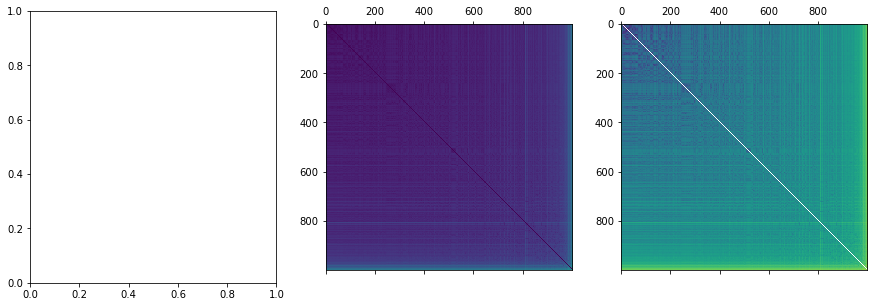

In [40]:
fig, axs = plt.subplots(ncols = 3, figsize=(15,5))
#axs[0].scatter(umap_proj[:, 0], umap_proj[:, 1], s=1, color='k', alpha=0.1)
axs[1].matshow(VAT)
axs[2].matshow(np.log(VAT))
plt.show()

In [39]:
VAT

array([[  0.        , 183.15129246, 185.97703208, ..., 205.4985798 ,
        217.74244622, 231.26990632],
       [183.15129246,   0.        ,  42.039683  , ...,  97.19302286,
        121.9089265 , 154.12016955],
       [185.97703208,  42.039683  ,   0.        , ...,  94.11328582,
        115.46920594, 151.68799361],
       ...,
       [205.4985798 ,  97.19302286,  94.11328582, ...,   0.        ,
        145.14199839, 174.29370732],
       [217.74244622, 121.9089265 , 115.46920594, ..., 145.14199839,
          0.        , 185.7949353 ],
       [231.26990632, 154.12016955, 151.68799361, ..., 174.29370732,
        185.7949353 ,   0.        ]])

In [ ]:
np.shape(umap_proj)

In [ ]:
clusterability_df[:3]

In [ ]:
clusterability_df.dataset.unique()

In [ ]:
clusterability_df['species'] = [species_dict[ds]['species']  for ds in clusterability_df['dataset'].values]
clusterability_df['family'] = [species_dict[ds]['group']  for ds in clusterability_df['dataset'].values]

In [ ]:
import seaborn as sns

In [ ]:
metric = 'hopkins_statistic'
sns.barplot(x=metric,
            y="species",
            hue='family',
            data=clusterability_df.sort_values(by=metric),
            )